In [1]:
!pip install scikit-learn

You should consider upgrading via the 'c:\users\vaibh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [3]:
df = pd.read_csv('framingham_heart_disease_new.csv')

In [4]:
df.shape

(4238, 16)

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   int64  
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   int64  
 5   BPMeds           4238 non-null   int64  
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   int64  
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   int64  
 14  glucose          4238 non-null   int64  
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 529.9 KB


In [7]:
df.fillna(0)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1
4234,1,51,3,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0
4235,0,48,2,1,20,0,0,0,0,248,131.0,72.0,22.00,84,86,0
4236,0,44,1,1,15,0,0,0,0,210,126.5,87.0,19.16,86,0,0


In [8]:
df.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [9]:
target_name = 'TenYearCHD'
y = df[target_name]

X = df.drop(target_name, axis=1)

In [10]:
X.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [11]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler(df)

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=7,shuffle = True)

In [13]:
#Logistic Regression Without Optimal Features

In [17]:
#Logistic Regression w/o
from sklearn.linear_model import LogisticRegression
lrl = LogisticRegression()

lrl.fit(X_train,y_train)

y_pred=lrl.predict(X_test)
lgr_pred_proba = lrl.predict_proba(X_test)[:,1]

print("Accuracy Score",accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred,digits=4))
print("ROC AUC Score:",roc_auc_score(y_test, lgr_pred_proba))

Accuracy Score 83.01886792452831
Confusion Matrix:
 [[352   4]
 [ 68   0]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8381    0.9888    0.9072       356
           1     0.0000    0.0000    0.0000        68

    accuracy                         0.8302       424
   macro avg     0.4190    0.4944    0.4536       424
weighted avg     0.7037    0.8302    0.7617       424

ROC AUC Score: 0.6448694646397884


c:\users\vaibh\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


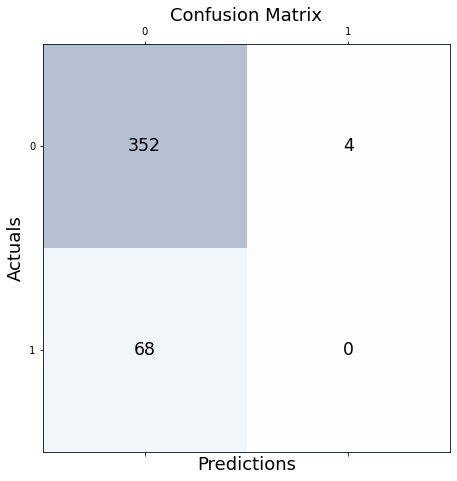

In [19]:

#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [20]:
y_pred.shape

(424,)

In [21]:
#LDA w/o
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda= LDA()
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)

print('Test Accuracy:',round(accuracy_score(y_test,y_pred_lda)*100,2))
print('Classification Report :\n',classification_report(y_test,y_pred_lda,digits=4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_lda))


Test Accuracy: 82.55
Classification Report :
               precision    recall  f1-score   support

           0     0.8422    0.9747    0.9036       356
           1     0.2500    0.0441    0.0750        68

    accuracy                         0.8255       424
   macro avg     0.5461    0.5094    0.4893       424
weighted avg     0.7473    0.8255    0.7707       424

Confusion Matrix:
 [[347   9]
 [ 65   3]]


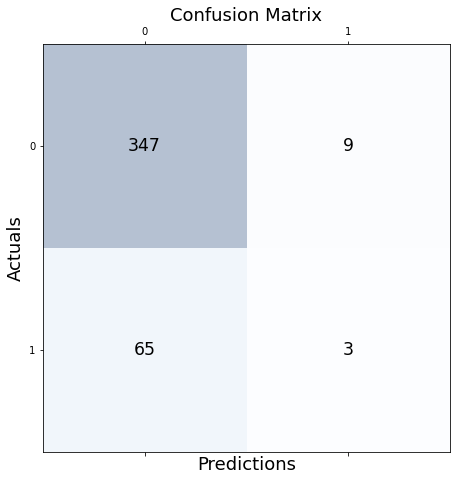

In [22]:
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [24]:
#RFC w/o 
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
import datetime
start = datetime.datetime.now()

RFC.fit(X_train,y_train)
end = datetime.datetime.now()
print("Total execution time: ", end-start)

y_pred=RFC.predict(X_test)
rfc_pred_proba = RFC.predict_proba(X_test)[:,1]

print("Accuracy Score",accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred,digits=4))
print("ROC AUC Score:",roc_auc_score(y_test, rfc_pred_proba))

Total execution time:  0:00:01.476938
Accuracy Score 83.25471698113208
Confusion Matrix:
 [[353   3]
 [ 68   0]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8385    0.9916    0.9086       356
           1     0.0000    0.0000    0.0000        68

    accuracy                         0.8325       424
   macro avg     0.4192    0.4958    0.4543       424
weighted avg     0.7040    0.8325    0.7629       424

ROC AUC Score: 0.689730667547918


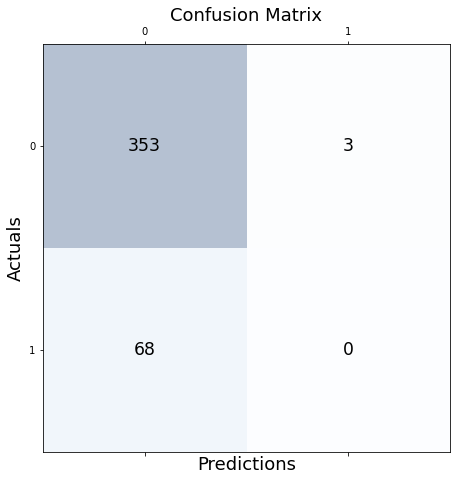

In [25]:
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [26]:
from boruta import BorutaPy

In [27]:
feat_selector = BorutaPy(RFC, n_estimators='auto', verbose=2, random_state=1, max_iter=100)

In [28]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86
4234,1,51,3,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68
4235,0,48,2,1,20,0,0,0,0,248,131.0,72.0,22.00,84,86
4236,0,44,1,1,15,0,0,0,0,210,126.5,87.0,19.16,86,0


In [29]:
y


0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [30]:
type(X)

pandas.core.frame.DataFrame

In [31]:
X= X.to_numpy()

In [32]:
y= y.to_numpy()

In [33]:
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	9
Iteration:

BorutaPy(estimator=RandomForestClassifier(n_estimators=28,
                                          random_state=RandomState(MT19937) at 0x127406FEA40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x127406FEA40, verbose=2)

In [34]:
feat_selector.support_

array([False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False])

In [35]:
print("Ranking: ",feat_selector.ranking_)

Ranking:  [ 9  1  7 10  6 12 13  8 11  2  1  3  1  5  3]


In [36]:
print("No. of signinficant features: ", feat_selector.n_features_)

No. of signinficant features:  3


In [37]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                    'Ranking':feat_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
1,age,1
10,sysBP,1
12,BMI,1
9,totChol,2
11,diaBP,3
14,glucose,3
13,heartRate,5
4,cigsPerDay,6
2,education,7
7,prevalentHyp,8


In [38]:
best_features= feat_selector.transform(X)

In [39]:
best_features.shape

(4238, 3)

In [40]:
best_features

array([[ 39.  , 106.  ,  26.97],
       [ 46.  , 121.  ,  28.73],
       [ 48.  , 127.5 ,  25.34],
       ...,
       [ 48.  , 131.  ,  22.  ],
       [ 44.  , 126.5 ,  19.16],
       [ 52.  , 133.5 ,  21.47]])

In [41]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [42]:
best_features.shape, y.shape

((4238, 3), (4238,))

In [43]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(best_features,y, test_size=0.1, random_state=7, shuffle = True)

In [44]:
X_train1.shape, y_train1.shape

((3814, 3), (3814,))

In [45]:
X_test1.shape, y_test1.shape

((424, 3), (424,))

In [46]:
#RFC
from sklearn.ensemble import RandomForestClassifier

RFC1 = RandomForestClassifier()

RFC1.fit(X_train1,y_train1)
end = datetime.datetime.now()

y_pred1=RFC1.predict(X_test1)


print("Accuracy Score",accuracy_score(y_test1,y_pred1)*100)
print("Confusion Matrix:\n",confusion_matrix(y_test1,y_pred1))
print("Classification Report:\n", classification_report(y_test1,y_pred1,digits=4))


Accuracy Score 82.0754716981132
Confusion Matrix:
 [[345  11]
 [ 65   3]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8415    0.9691    0.9008       356
           1     0.2143    0.0441    0.0732        68

    accuracy                         0.8208       424
   macro avg     0.5279    0.5066    0.4870       424
weighted avg     0.7409    0.8208    0.7681       424



In [48]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train1,y_train1)

y_pred_1=lr.predict(X_test1)
lgr_pred_proba1 = lr.predict_proba(X_test1)[:,1]

print("Accuracy Score",accuracy_score(y_test1,y_pred_1)*100)
print("Confusion Matrix:\n",confusion_matrix(y_test1,y_pred_1))
print("Classification Report:\n",classification_report(y_test1,y_pred_1,digits=4))


Accuracy Score 83.72641509433963
Confusion Matrix:
 [[354   2]
 [ 67   1]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8409    0.9944    0.9112       356
           1     0.3333    0.0147    0.0282        68

    accuracy                         0.8373       424
   macro avg     0.5871    0.5045    0.4697       424
weighted avg     0.7595    0.8373    0.7696       424



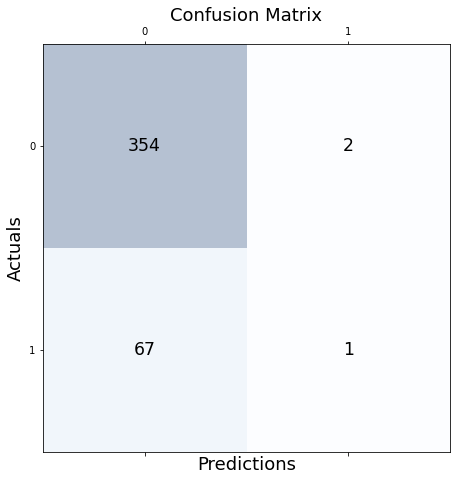

In [49]:
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test1, y_pred=y_pred_1)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [50]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda1= LDA()
lda1.fit(X_train1, y_train1)

y_pred_lda1 = lda1.predict(X_test1)

print('Test Accuracy:',round(accuracy_score(y_test1,y_pred_lda1)*100,2))
print('Classification Report :\n',classification_report(y_test1,y_pred_lda1,digits=4))
print('Confusion Matrix:\n',confusion_matrix(y_test1,y_pred_lda1))



Test Accuracy: 83.02
Classification Report :
               precision    recall  f1-score   support

           0     0.8413    0.9831    0.9067       356
           1     0.2500    0.0294    0.0526        68

    accuracy                         0.8302       424
   macro avg     0.5457    0.5063    0.4797       424
weighted avg     0.7465    0.8302    0.7698       424

Confusion Matrix:
 [[350   6]
 [ 66   2]]


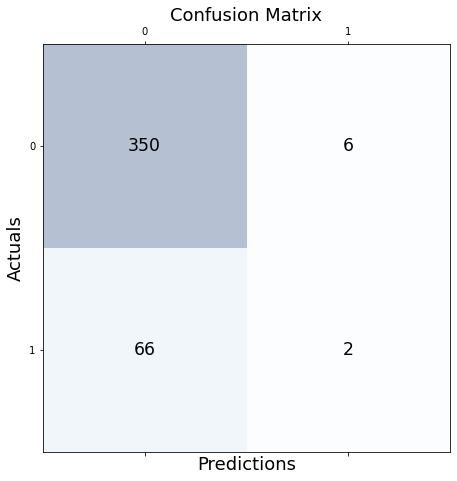

In [51]:
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test1, y_pred=y_pred_lda1)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [44]:
!pip install imblearn

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
unique, count = np.unique(y_train1, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count

{0: 3238, 1: 576}

In [50]:
#SMOTE
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train1, y_train1)

In [51]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique,count)}
y_train_smote_value_count

{0: 3238, 1: 3238}

In [52]:
clf = LogisticRegression().fit(x_train_res, y_train_res)

In [53]:
y_Test_Pred = clf.predict(X_test1)

In [54]:
pd.crosstab(pd.Series(y_Test_Pred, name = 'Predicted'),
           pd.Series(y_test1, name = 'Actual'))

Actual,0,1
Predicted,,
0,230,22
1,126,46


In [71]:
generate_model_report(y_test1, y_Test_Pred)

NameError: name 'generate_model_report' is not defined

In [55]:
weights = np.linspace(0.005, 0.25, 10)
weights

array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ])

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
make_pipeline(StandardScaler(), GaussianNB(priors=None))


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [69]:
estimator.get_params().keys()

NameError: name 'estimator' is not defined

In [70]:
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__ratio': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train1, y_train1 )

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                  'weight': weights })
weight_f1_score_df.plot(x='weight')

ValueError: Invalid parameter ratio for estimator SMOTE(). Check the list of available parameters with `estimator.get_params().keys()`.

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train_res, y_train_res)

y_pred_4=lr.predict(x_train_res)
lgr_pred_proba4 = lr.predict_proba(x_train_res)[:,1]

print("Accuracy Score",accuracy_score(y_Test_Pred,y_pred_4)*100)
print("Confusion Matrix:\n",confusion_matrix(y_Test_Pred,y_pred_4))

print("Classification Report:\n",classification_report(y_Test_Pred,y_pred_4,digits=4))


ValueError: Found input variables with inconsistent numbers of samples: [424, 6476]

In [64]:
np.bincount(y_res)

NameError: name 'y_res' is not defined

TypeError: __init__() got an unexpected keyword argument 'ratio'

In [65]:
y_res.shape
# y_pred_1.shape

NameError: name 'y_res' is not defined

In [66]:
#SMOTE
from sklearn.metrics import classification_report
clf1 = LogisticRegression(random_state=0)
clf1.fit(X_res, y_res)
y_pred1=clf1.predict(X_test1)
print('Test Accuracy:',round(accuracy_score(y_res,y_pred1)*100,2))
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1,af))

NameError: name 'X_res' is not defined

In [59]:
# y_res.shape
y_pred_1.shape

(424,)

In [42]:
#LDA with SMOTE

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda1= LDA()
lda1.fit(X_train1, y_train1)

y_pred_lda1 = lda1.predict(X_res)

print('Test Accuracy:',round(accuracy_score(y_test1,y_pred_lda1)*100,2))
print('Classification Report :\n',classification_report(y_test1,y_pred_lda1,digits=4))
print('Confusion Matrix:\n',confusion_matrix(y_test1,y_pred_lda1))

ValueError: Found input variables with inconsistent numbers of samples: [424, 6476]